In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.datasets import fashion_mnist, cifar100
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# fashion_mnist dataset 로드
(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


### 1. 로드한 이미지의 특징에 대해 간단히 서술하시오.

[정답] Fashion MNIST 데이터셋은 운동화, 셔츠, 샌들과 같은 작은 이미지들의 모음이며, 기본 MNIST 데이터셋과 같이 열 가지로 분류될 수 있는 28×28 픽셀의 이미지 70,000개로 이루어져 있습니다.

### 2. training data와 test data의 수는 각각 몇 개의 이미지인가?

[정답] 각각 60,000개와 10,000개의 이미지이다.

### 3. 로드한 fashion_mnist는 0~9까지 10개의 class이다. 이를 확인할 수 있는 코드를 작성하고, 실행하시오.

In [ ]:
# 코드 작성
y_val = np.unique(y_train)

print('class의 종류:', y_val)
print('class의 수:', len(y_val))

class의 종류: [0 1 2 3 4 5 6 7 8 9]
class의 수: 10


### 4. 아래와 같은 순서의 CNN 모델을 구성하시오.

- 1) Convolution layer 2x2 kernels 16개
- 2) Max Pooling layer 2x2 window
- 3) Convolution layer 3x3 kernels 32개
- 4) Max Pooling layer 2x2 window
- 5) Flatten layer
- 6) 이후 layer는 자유롭게 구성

In [ ]:
model = Sequential([
    Conv2D(filters=16,kernel_size=(2,2),strides=(1,1),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    Conv2D(filters=32,kernel_size=(3,3),strides=(1,1),activation='relu',input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2),strides=(2,2)),
    Flatten()
])

### 5. 이미지 데이터(x_train과 x_test) 각 픽셀의 최대값과 최소값은 얼마인가?

[정답] 255와 0이다.

### 6. 이미지 데이터(x_train과 x_test)를 위의 CNN 모델에 적용할 수 있는 형태로 변형하고 값이 0과 1사이의 값이 되도록 정규화 하는 코드를 작성하시오.

- 변형 및 정규화된 데이터를 Xtrain과 Xtest에 저장하시오.

In [ ]:
# 코드 작성
Xtrain = x_train/255
Xtest = x_test/255

### 7. compile 및 학습하시오. (batch size는 100내외, epoch은 10내외로 설정하고, 학습데이터의 30%(0.3)를 검증(validation)에 이용하시오.)

In [ ]:
# 코드 작성
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])

model_result = model.fit(Xtrain, y_train, epochs=10, batch_size=100, validation_split=0.3)

Epoch 1/10
420/420 [==============================] - 18s 40ms/step - loss: 7.2141 - acc: 0.0938 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 2/10
420/420 [==============================] - 17s 41ms/step - loss: 6.6847 - acc: 0.0996 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 3/10
420/420 [==============================] - 19s 44ms/step - loss: 6.6847 - acc: 0.0996 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 4/10
420/420 [==============================] - 16s 39ms/step - loss: 6.6847 - acc: 0.0996 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 5/10
420/420 [==============================] - 16s 39ms/step - loss: 6.6847 - acc: 0.0996 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 6/10
420/420 [==============================] - 16s 39ms/step - loss: 6.6847 - acc: 0.0996 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 7/10
420/420 [==============================] - 17s 39ms/step - loss: 6.6847 - acc: 0.0996 - val_loss: 6.6849 - val_acc: 0.1008
Epoch 8/10
420/420 [==============================] - 16s 39ms

### 8. 위에서 생성한 model에 x_test 이미지를 적용했을 때의 정확도를 구하시오.

In [ ]:
# 코드 작성
# 정확도: ??
model.evaluate(Xtest, y_test)

313/313 [==============================] - 2s 7ms/step - loss: 6.6846 - acc: 0.1000


[6.684594631195068, 0.10000000149011612]

[정답]  정확도 :

### 9. 잘못 분류된 이미지 데이터 3개를 plot하고 실제 class와 예측한 class의 결과를 함께 보여주시오.

313/313 [==============================] - 1s 4ms/step


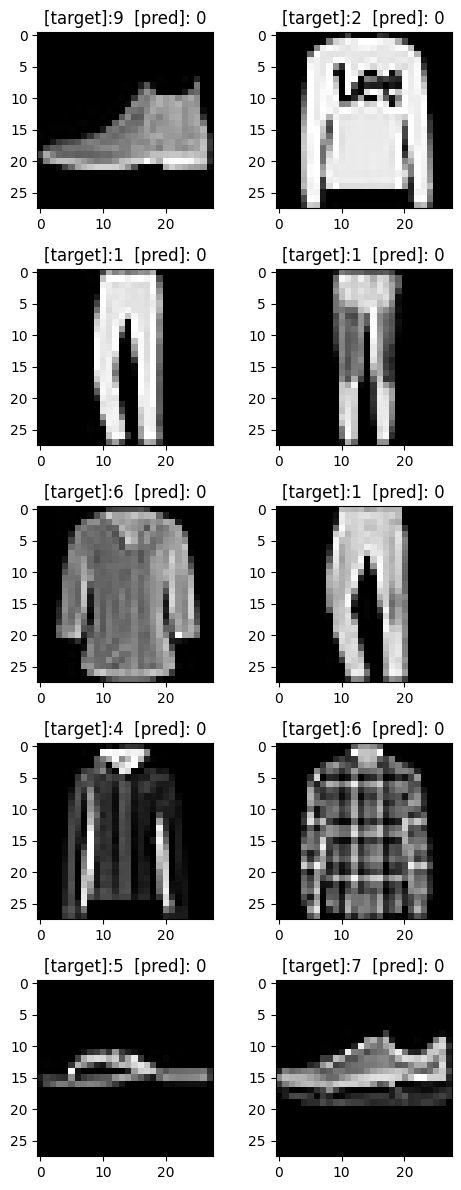

In [ ]:
# 코드 작성
pred_proba = model.predict(Xtest)
pred = np.argmax(pred_proba, axis=1)
wrong_ind = np.argwhere(y_test!=pred)
wrong_ind = wrong_ind.ravel()

j = 1

plt.figure(figsize=(5, 12))

for i in wrong_ind[:10]:
  plt.subplot(5, 2, j)
  plt.imshow(x_test[i], cmap='gray')
  plt.title('[target]:'+str(y_test[i])+'  [pred]: '+str(pred[i]))

  j = j+1

plt.tight_layout()